In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

In [123]:
# initializing variables given in Results page + Equation Set 4
a = 2
b = 1
N = 50

n = np.random.uniform(1,N)
lambda1 = np.random.gamma(a, b)
lambda2 = np.random.gamma(a, b) * 4

x1 = np.random.poisson(lambda1, int(n))
x2 = np.random.poisson(lambda2, N-int(n))
lambdas = [lambda1] * int(n) + [lambda2] * (N-int(n))
x = np.concatenate((x1, x2))

n: 30, lambda1: 1.24, lambda2: 5.62


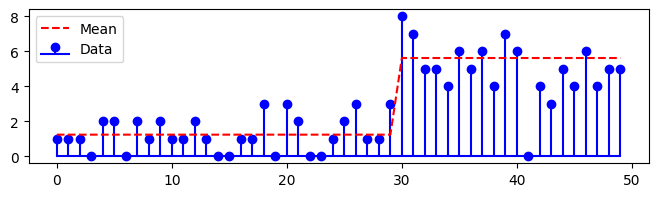

In [124]:
print(f"n: {int(n)}, lambda1: {np.round(lambda1, 2)}, lambda2: {np.round(lambda2, 2)}")
fig, ax = plt.subplots(figsize=(8, 2))
ax.stem(range(N), x, label='Data', linefmt='b-', markerfmt='bo', basefmt='b')
ax.plot(range(N), lambdas, 'r--', label='Mean')
ax.legend()
plt.show()

In [125]:
# Change-Point Model using PyMC

with pm.Model() as model:
    # inirialize priors
    n_ = pm.DiscreteUniform('n', lower=0, upper=N)
    lambda1_ = pm.Gamma('lambda1', alpha=a, beta=b)
    lambda2_ = pm.Gamma('lambda2', alpha=a, beta=b)

    lambda_ = pm.math.switch(n_ >= np.arange(0, N), lambda1_, lambda2_)
    x_obs = pm.Poisson('x_obs', lambda_, observed=x)

    # draw 5200 posterior samples
    trace = pm.sample(5200, return_inferencedata=False)

# Burn first 200 samples
ns = trace['n', 200:]
lam1 = trace['lambda1', 200:]
lam2 = trace['lambda2', 200:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [n]
>NUTS: [lambda1, lambda2]


/Users/ocfemil1/bayesian-ece-474/venv/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 5_200 draw iterations (4_000 + 20_800 draws total) took 3 seconds.


<Estimates> 	 n: 28.14 	 lambda1: 1.25 	 lambda2: 4.72
<True Values> 	 n: 30 	 	 lambda1: 1.24 	 lambda2: 5.62


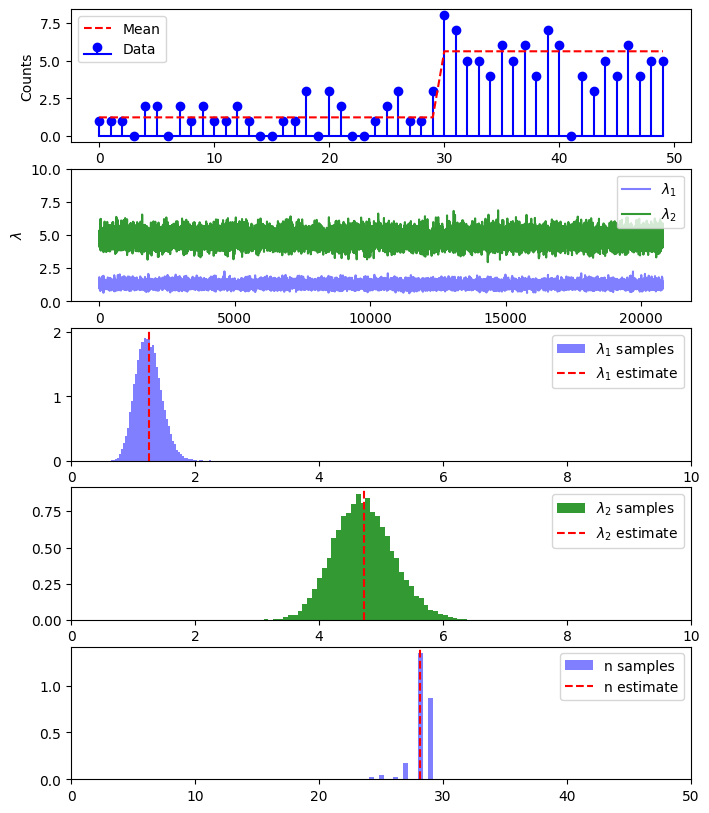

In [140]:
# redoing plot from gibbs paper
fig, ax = plt.subplots(5,1, figsize=(8, 10))

# plot data
ax[0].stem(range(N), x, label='Data', linefmt='b-', markerfmt='bo', basefmt='b')
ax[0].plot(range(N), lambdas, 'r--', label='Mean')
ax[0].set_ylabel('Counts')
ax[0].legend()

# Trace plot for lambdas
ax[1].plot(trace['lambda1'], color='blue', alpha=0.5, label='$\lambda_1$ ')
ax[1].plot(trace['lambda2'], color='green', alpha=0.8, label='$\lambda_2$ ')
ax[1].set_ylabel('$\lambda$')
ax[1].set_ylim(0, 10)

ax[1].legend()

# Histogram plot for lambda 1 
lam1_mean = np.round(sum(lam1)/len(lam1),2)
ax[2].hist(lam1, bins=50, density=True, color='blue', alpha=0.5, label='$\lambda_1$ samples')
ax[2].axvline(lam1_mean, color='red', linestyle='--', label='$\lambda_1$ estimate')
ax[2].set_xlim(0, 10)
ax[2].legend()

# Histogram plot for lambda 2
lam2_mean = np.round(sum(lam2)/len(lam2),2)
ax[3].hist(lam2, bins=50, density=True, color='green', alpha=0.8, label='$\lambda_2$ samples')
ax[3].axvline(lam2_mean, color='red', linestyle='--', label='$\lambda_2$ estimate')
ax[3].set_xlim(0, 10)
ax[3].legend()

# Histogram plot for change-point n
n_mean = np.round(sum(trace['n'])/len(trace['n']),2)
ax[4].hist(ns, bins=20, density=True, color='blue', alpha=0.5, label='n samples')
ax[4].axvline(n_mean, color='red', linestyle='--', label='n estimate')
ax[4].set_xlim(0, 50)
ax[4].legend()

print(f"<Estimates> \t n: {n_mean} \t lambda1: {lam1_mean} \t lambda2: {lam2_mean}")
print(f"<True Values> \t n: {int(n)} \t \t lambda1: {np.round(lambda1, 2)} \t lambda2: {np.round(lambda2, 2)}")
